In [1]:
def create_alisa_table(area_ratio):  # [1.2 0.4 0.4 2]
    """
    return: accept -> 接受的概率
    return: alias  -> 拒绝的时候，去哪个位置取样
    """

    l = len(area_ratio)
    accept, alias = [0] * l, [0] * l
    small, large = [], []

    for i, prob in enumerate(area_ratio):
        if prob < 1.0:
            small.append(i)
        else:
            large.append(i)

    while small and large:
        small_idx, large_idx = small.pop(), large.pop()
        accept[small_idx] = area_ratio[small_idx]
        alias[small_idx] = large_idx
        area_ratio[large_idx] = area_ratio[large_idx] - (1 - area_ratio[small_idx])
        if area_ratio[large_idx] < 1.0:
            small.append(large_idx)
        else:
            large.append(large_idx)

    while large:
        large_idx = large.pop()
        accept[large_idx] = 1
    while small:
        small_idx = small.pop()
        accept[small_idx] = 1
    return accept, alias


accept, alias = create_alisa_table([1.2, 0.4, 0.4, 2])
print(accept)
print(alias)

[1, 0.4, 0.4, 0.7999999999999999]
[0, 3, 3, 0]


In [2]:
import numpy as np


def alias_sample(accept, alias):
    N = len(accept)
    i = int(np.random.random() * N)
    r = np.random.random()
    if r < accept[i]:
        return i
    else:
        return alias[i]


def gen_prob_dist(N):
    p = np.random.randint(0, 100, N)
    return p / np.sum(p)


def simulate(N=20, k=10000):
    truth = gen_prob_dist(N)
    area_ratio = truth * N
    accept, alias = create_alisa_table(area_ratio)

    ans = np.zeros(N)
    for _ in range(k):
        i = alias_sample(accept, alias)
        ans[i] += 1

    return (ans / np.sum(ans)), truth

In [3]:
alias_result, truth = simulate()

In [4]:
print(alias_result)
print(truth)

[0.058  0.0406 0.057  0.0334 0.035  0.064  0.0327 0.0297 0.0715 0.0503
 0.0674 0.0811 0.0733 0.0292 0.0769 0.0532 0.039  0.0477 0.0471 0.0129]
[0.05968929 0.03843009 0.05887163 0.03352412 0.03352412 0.06459526
 0.03515944 0.0318888  0.07031889 0.05233034 0.0678659  0.08094849
 0.07113655 0.02861815 0.07767784 0.05151267 0.03924775 0.04824203
 0.0425184  0.01390025]


[Text(0.125, 0, '0'),
 Text(1.125, 0, '1'),
 Text(2.125, 0, '2'),
 Text(3.125, 0, '3'),
 Text(4.125, 0, '4'),
 Text(5.125, 0, '5'),
 Text(6.125, 0, '6'),
 Text(7.125, 0, '7'),
 Text(8.125, 0, '8'),
 Text(9.125, 0, '9'),
 Text(10.125, 0, '10'),
 Text(11.125, 0, '11'),
 Text(12.125, 0, '12'),
 Text(13.125, 0, '13'),
 Text(14.125, 0, '14'),
 Text(15.125, 0, '15'),
 Text(16.125, 0, '16'),
 Text(17.125, 0, '17'),
 Text(18.125, 0, '18'),
 Text(19.125, 0, '19')]

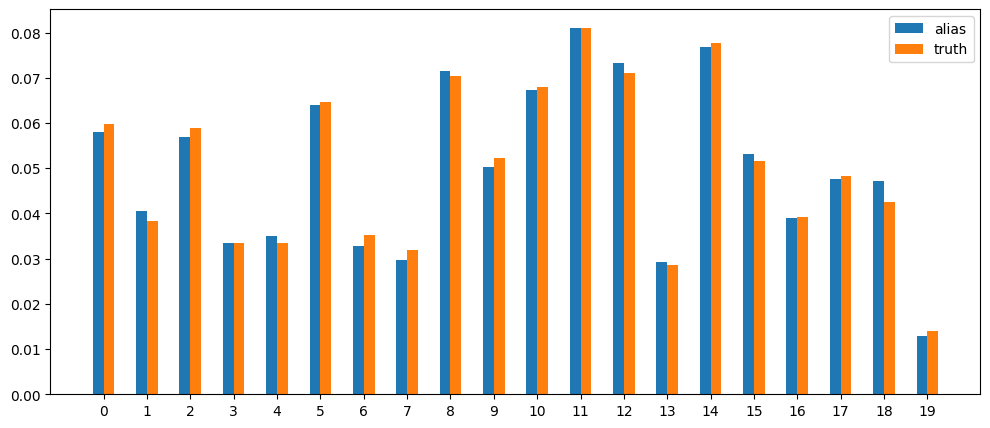

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))
xticks = np.arange(len(alias_result))
ax.bar(xticks, height=alias_result, width=0.25,label="alias")
ax.bar(xticks+0.25, height=truth, width=0.25, label="truth")
ax.legend()

ax.set_xticks(xticks+0.25/2)
ax.set_xticklabels(xticks)

# plt.show()